In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
import seaborn as sns
import joblib
sns.set(rc={'figure.figsize': [7, 7]}, font_scale=1.2)

In [29]:
df = pd.read_csv('..\\..\\datasets\\Country-Data.csv', na_values=['missing', 'xx', 'x', '?', '-'])
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [31]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [32]:
df['country'].value_counts()

Czech Republic    1
Guinea            1
Germany           1
Burkina Faso      1
Spain             1
                 ..
Luxembourg        1
Serbia            1
Albania           1
Vanuatu           1
Liberia           1
Name: country, Length: 167, dtype: int64

In [33]:
sub_df = df.drop('country', axis=1)
sub_df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [34]:
sub_df.isna().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [35]:
scaler = StandardScaler()
sub_df = scaler.fit_transform(sub_df)

# Hierarchical Clustering

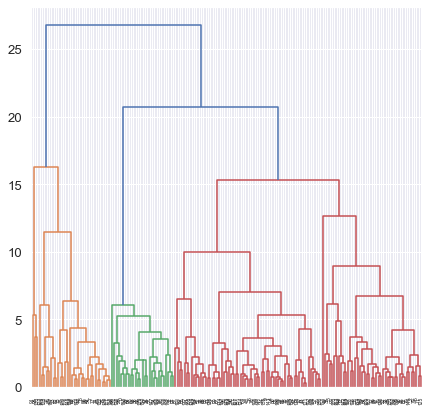

In [36]:
dendrogram = sch.dendrogram(sch.linkage(sub_df, method='ward'))

In [37]:
model = AgglomerativeClustering(n_clusters=9)
clusters = model.fit_predict(sub_df)
clusters

array([6, 0, 1, 8, 0, 1, 0, 4, 4, 0, 0, 2, 1, 0, 0, 4, 0, 6, 3, 1, 0, 3,
       1, 2, 0, 6, 6, 3, 6, 4, 0, 6, 6, 1, 1, 1, 6, 6, 8, 0, 6, 0, 0, 0,
       4, 1, 1, 1, 0, 8, 1, 0, 3, 4, 4, 1, 6, 0, 4, 1, 4, 0, 1, 6, 6, 3,
       6, 0, 4, 1, 1, 1, 8, 4, 4, 4, 0, 4, 0, 1, 6, 3, 2, 3, 1, 0, 0, 3,
       3, 2, 0, 7, 0, 6, 6, 0, 0, 6, 7, 8, 0, 3, 0, 8, 0, 0, 6, 1, 3, 1,
       4, 4, 6, 5, 4, 2, 1, 0, 0, 1, 1, 0, 4, 2, 0, 1, 6, 0, 2, 6, 0, 0,
       6, 7, 0, 0, 3, 3, 0, 4, 1, 0, 8, 0, 4, 4, 1, 6, 0, 8, 6, 0, 0, 1,
       1, 6, 0, 2, 4, 4, 1, 1, 3, 8, 0, 8, 6], dtype=int64)

In [38]:
pd.Series(clusters).value_counts()

0    49
1    32
6    27
4    23
3    14
8    10
2     8
7     3
5     1
dtype: int64

In [39]:
df['cluster']=clusters

In [40]:
joblib.dump(model, 'Hierarchical_model.h5')
joblib.dump(scaler, 'scaler.h5')

['scaler.h5']

# KMeans

C:\Users\moham\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


Text(0, 0.5, 'Score')

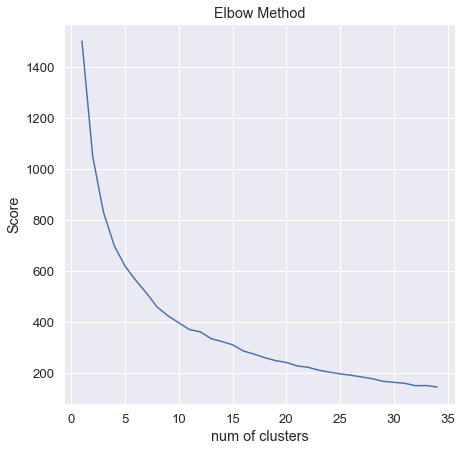

In [42]:
scores = []
for i in range(1, 35):
    model = KMeans(n_clusters=i)
    model.fit(sub_df)
    scores.append(model.inertia_)
plt.plot(range(1, 35), scores)
plt.title("Elbow Method")
plt.xlabel("num of clusters")
plt.ylabel("Score")

In [44]:
model = KMeans(n_clusters=22)
clusters = model.fit_predict(sub_df)
clusters

array([ 4,  8,  0, 20,  8, 17,  8, 11,  5,  0, 11, 13, 14,  8,  8,  1,  7,
        4,  7,  0, 19, 10, 17, 13,  8,  4,  3,  7,  4, 11,  8,  4,  4, 17,
       17, 17,  4,  4, 20, 19,  4,  8,  2,  2,  5, 17, 17,  0,  8, 20, 14,
        2,  7, 11, 11,  0,  4, 19, 11, 14, 11,  8,  0,  4,  4,  7, 18,  2,
        5, 14,  0, 17,  0,  1, 11, 11,  8, 11,  7,  0, 14, 10, 13,  7, 14,
        2,  8, 10, 10, 13,  2,  6,  8, 14,  4,  2,  2,  4, 12, 20,  8, 19,
       19,  9, 19,  8,  4, 14, 10,  0,  1, 11,  4, 15,  5, 13, 14,  2,  7,
       17,  0,  8, 11, 16,  8, 17,  3,  8, 13,  4, 19,  2,  3, 12,  2,  2,
       10, 10,  2, 11,  0,  8, 14,  8,  5,  5,  0,  4,  2,  3, 10,  8,  8,
       17,  7,  3,  8, 13, 11, 21, 17,  0,  7,  9,  7,  0,  4])

In [45]:
df['cluster']=clusters
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,4
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,8
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,20
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,8
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,7
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,9
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,7
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0


In [46]:
joblib.dump(model, 'kmeans_model.h5')

['kmeans_model.h5']